In [40]:
import numpy as np
from sklearn.metrics import pairwise
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [41]:
# load the whole embedding into memory
model = dict()
f = open('vectors.txt')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    model[word] = coefs
f.close()
print('Loaded %s word vectors.' % (len(model)))

Loaded 400001 word vectors.


In [42]:
#Function to compute simialr words
def similar_words(model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    if(word in model.keys()):
      a = model[word]
    else:
      print('No word embeddings found for %s' % word)
      return

    for item in target_list :
        if item != word :
            b = model [item]
            cos_sim = pairwise.cosine_similarity(a.reshape(1, -1),b.reshape(1, -1))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True)
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]

In [43]:
similar_words_life = similar_words(model,'life',list(model.keys()),20)

In [44]:
similar_words_life

[('mind', array([[0.8514842]], dtype=float32)),
 ('love', array([[0.84034383]], dtype=float32)),
 ('lives', array([[0.8392689]], dtype=float32)),
 ('own', array([[0.8369904]], dtype=float32)),
 ('kind', array([[0.8338872]], dtype=float32)),
 ('experience', array([[0.8213189]], dtype=float32)),
 ('child', array([[0.8168196]], dtype=float32)),
 ('perhaps', array([[0.8082367]], dtype=float32)),
 ('she', array([[0.80810386]], dtype=float32)),
 ('whose', array([[0.8071582]], dtype=float32)),
 ('indeed', array([[0.8049615]], dtype=float32)),
 ('her', array([[0.8037769]], dtype=float32)),
 ('same', array([[0.8023736]], dtype=float32)),
 ('work', array([[0.80224234]], dtype=float32)),
 ('true', array([[0.8017044]], dtype=float32)),
 ('way', array([[0.8002954]], dtype=float32)),
 ('once', array([[0.8001491]], dtype=float32)),
 ('fact', array([[0.7996559]], dtype=float32)),
 ('this', array([[0.79941666]], dtype=float32)),
 ('much', array([[0.7988869]], dtype=float32))]

In [45]:
similar_words_market = similar_words(model,'market',list(model.keys()),20)

In [46]:
similar_words_market

[('markets', array([[0.9401179]], dtype=float32)),
 ('prices', array([[0.9033576]], dtype=float32)),
 ('stock', array([[0.88501495]], dtype=float32)),
 ('buying', array([[0.8556633]], dtype=float32)),
 ('consumer', array([[0.84729946]], dtype=float32)),
 ('retail', array([[0.8450345]], dtype=float32)),
 ('stocks', array([[0.84003514]], dtype=float32)),
 ('price', array([[0.8383354]], dtype=float32)),
 ('sales', array([[0.8324213]], dtype=float32)),
 ('business', array([[0.8298592]], dtype=float32)),
 ('trend', array([[0.8276469]], dtype=float32)),
 ('rise', array([[0.8247451]], dtype=float32)),
 ('industry', array([[0.8199745]], dtype=float32)),
 ('sector', array([[0.81712514]], dtype=float32)),
 ('investors', array([[0.81416774]], dtype=float32)),
 ('trading', array([[0.8051414]], dtype=float32)),
 ('demand', array([[0.803658]], dtype=float32)),
 ('economy', array([[0.8026539]], dtype=float32)),
 ('higher', array([[0.8007708]], dtype=float32)),
 ('analysts', array([[0.7987768]], dtype

In [47]:
similar_words_stanford = similar_words(model,'stanford',list(model.keys()),20)

In [48]:
similar_words_stanford

[('ucla', array([[0.8524496]], dtype=float32)),
 ('harvard', array([[0.8466463]], dtype=float32)),
 ('yale', array([[0.839353]], dtype=float32)),
 ('princeton', array([[0.8349352]], dtype=float32)),
 ('rutgers', array([[0.81282043]], dtype=float32)),
 ('university', array([[0.79061794]], dtype=float32)),
 ('baylor', array([[0.77228814]], dtype=float32)),
 ('graduate', array([[0.76686966]], dtype=float32)),
 ('georgetown', array([[0.7636426]], dtype=float32)),
 ('cornell', array([[0.76065105]], dtype=float32)),
 ('fordham', array([[0.75710684]], dtype=float32)),
 ('asu', array([[0.7540746]], dtype=float32)),
 ('usc', array([[0.7407924]], dtype=float32)),
 ('uc', array([[0.73527837]], dtype=float32)),
 ('hopkins', array([[0.7346757]], dtype=float32)),
 ('usf', array([[0.73388517]], dtype=float32)),
 ('professor', array([[0.72328305]], dtype=float32)),
 ('berkeley', array([[0.72201467]], dtype=float32)),
 ('college', array([[0.7217255]], dtype=float32)),
 ('villanova', array([[0.71997994]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


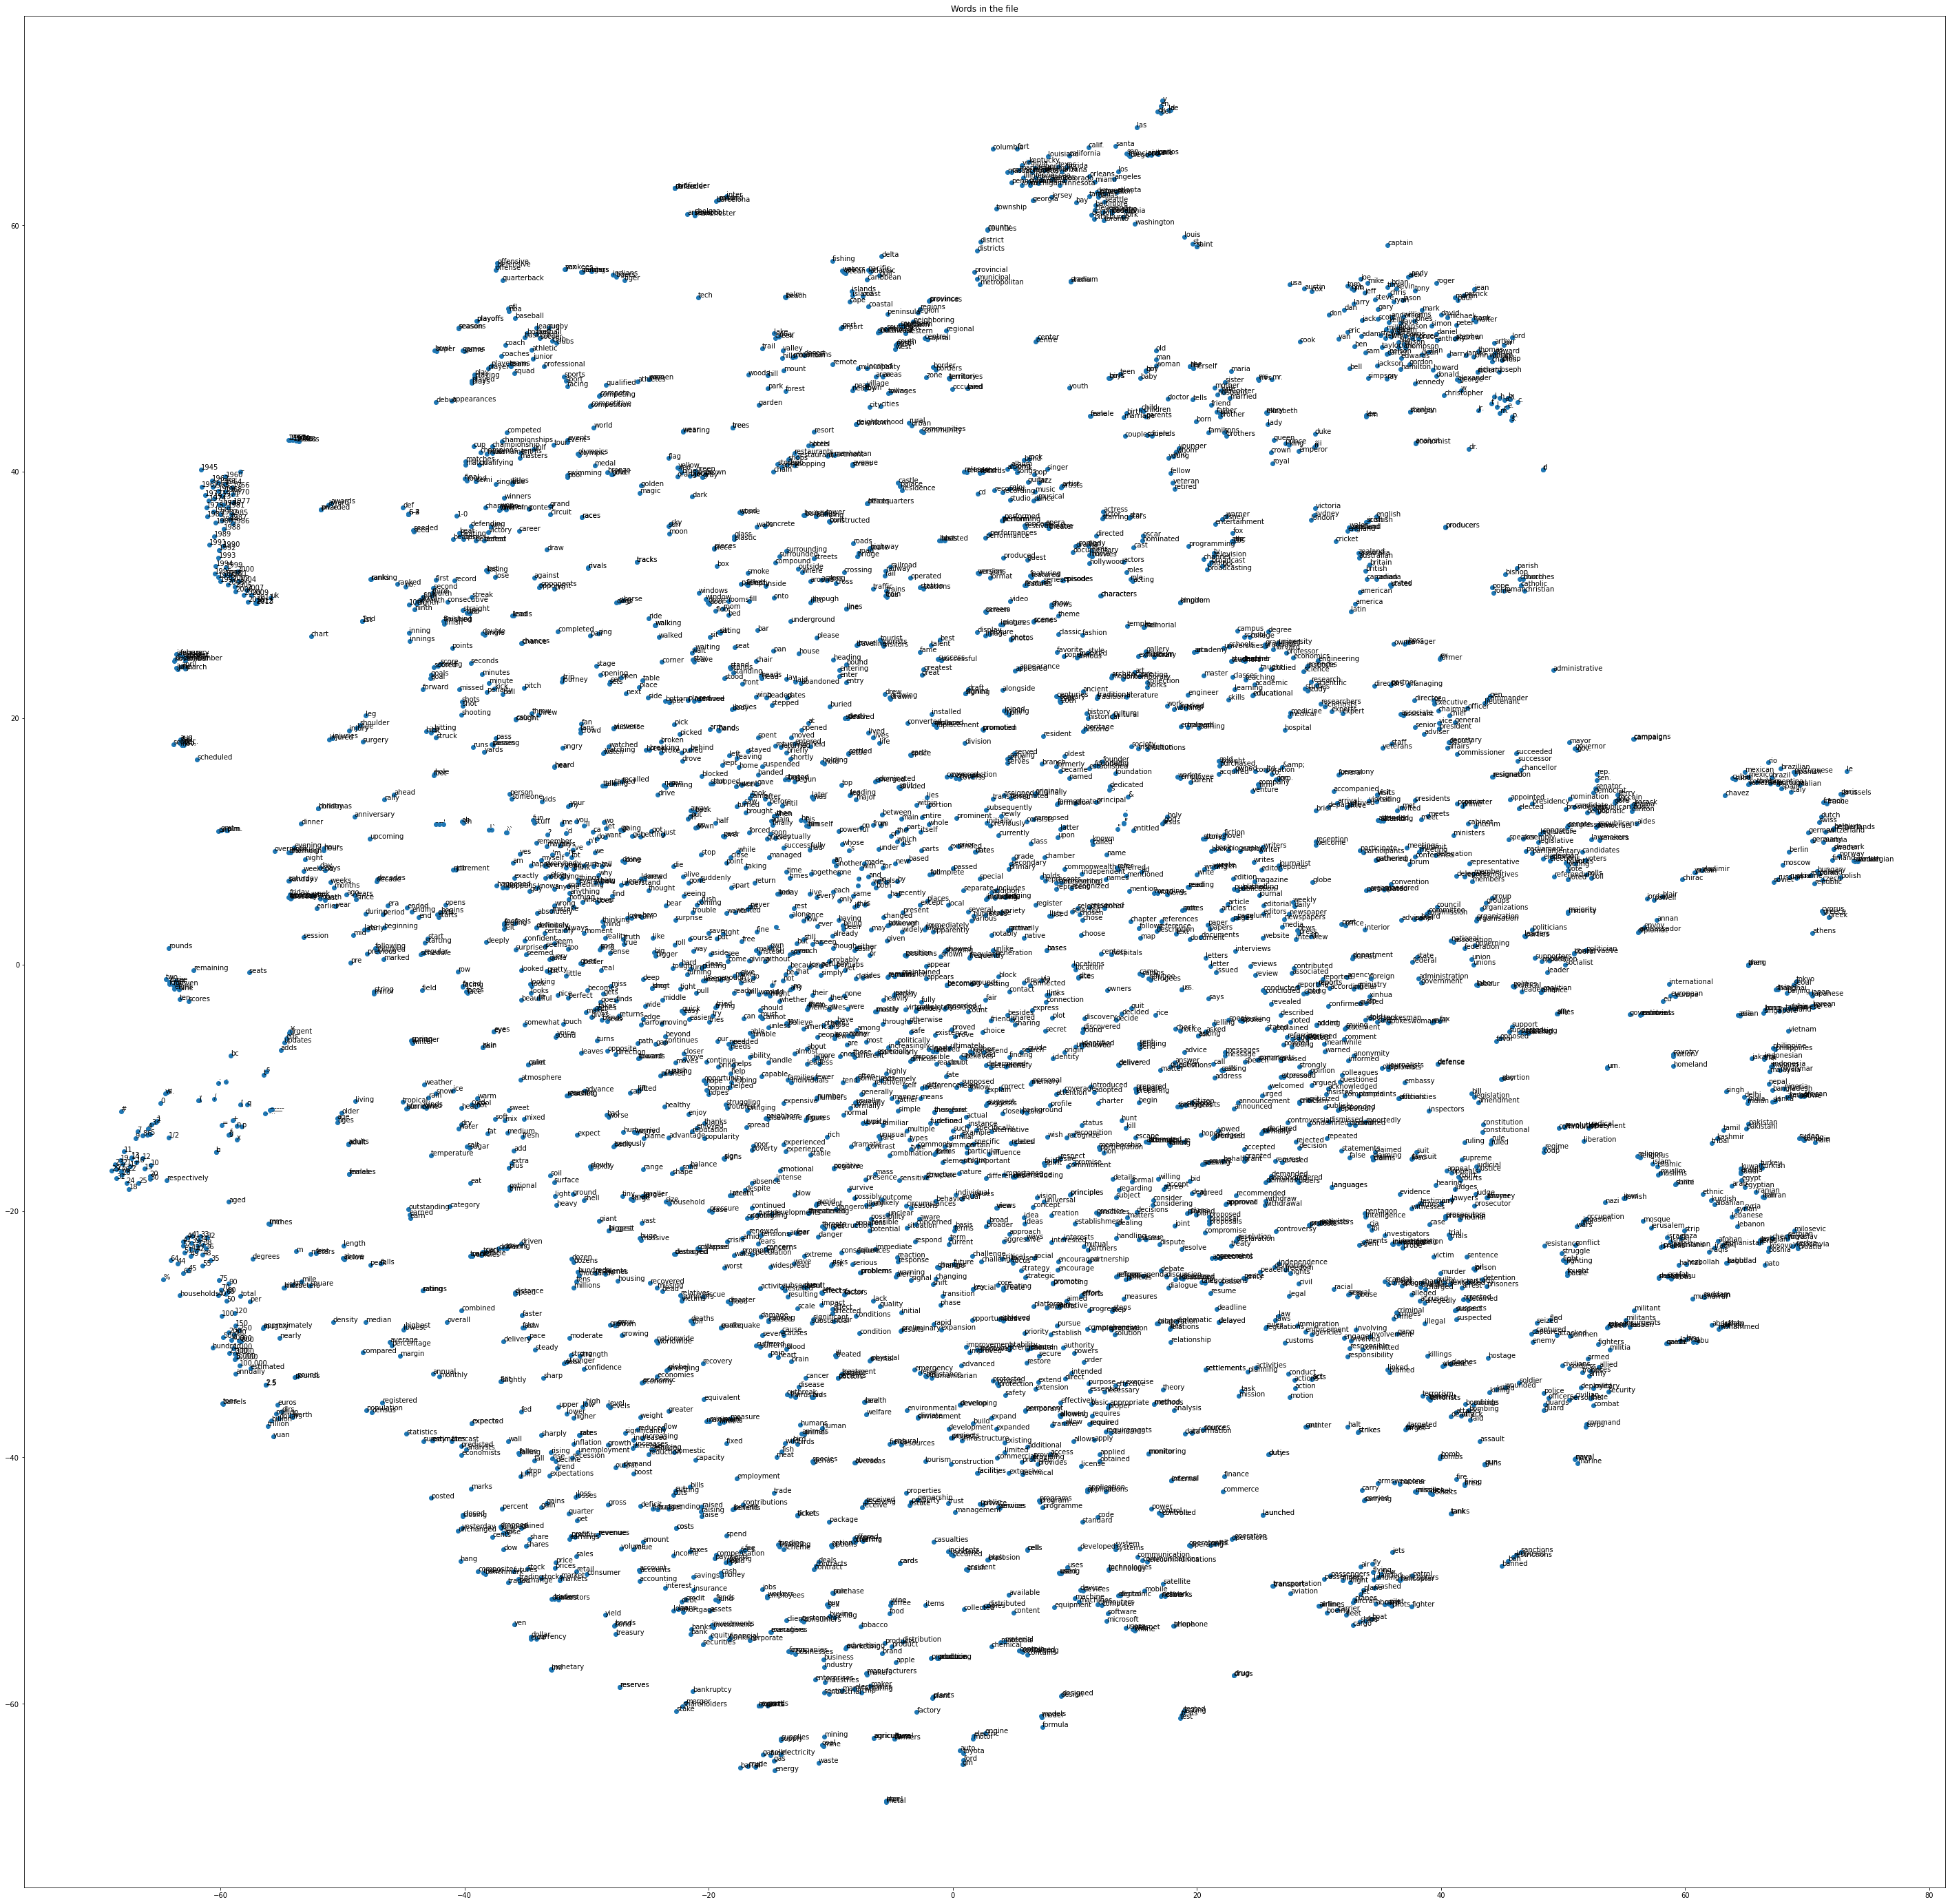

In [53]:
#Visualization 
tsne = TSNE(n_components=2, random_state=0)
words = list(model.keys())
word_vec = [model[word] for word in words]
Y = tsne.fit_transform(word_vec[:4000])

plt.figure(figsize=(50,50))
plt.title("Words in the file")
plt.scatter(Y[:,0], Y[:,1])

for label, x, y in zip(words, Y[:,0], Y[:,1]):
  plt.annotate(label, xy=(x,y), xytext=(0,0), textcoords="offset points")
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


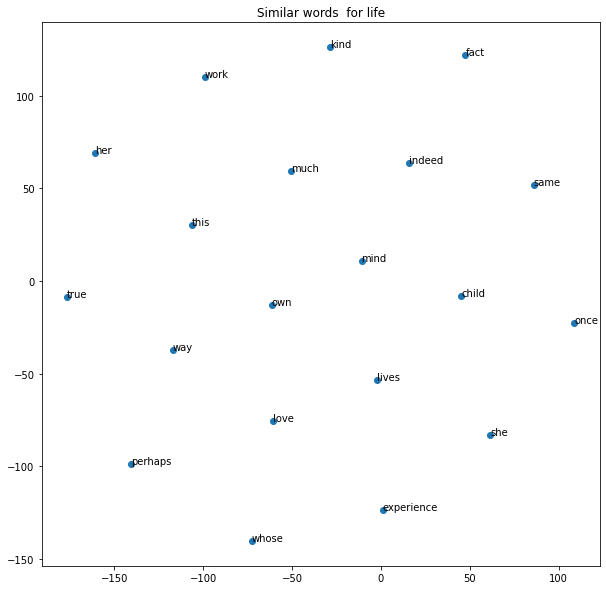

In [49]:
#Visualization for similar words for 'life'
tsne = TSNE(n_components=2, random_state=0)
# words = list(similar_words_life)
words = []
for i in range(len(similar_words_life)):
  words.append(similar_words_life[i][0])
word_vec = [model[word] for word in words]
Y = tsne.fit_transform(word_vec)

plt.figure(figsize=(10,10))
plt.title("Similar words  for life")
plt.scatter(Y[:,0], Y[:,1])

for label, x, y in zip(words, Y[:,0], Y[:,1]):
  plt.annotate(label, xy=(x,y), xytext=(0,0), textcoords="offset points")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


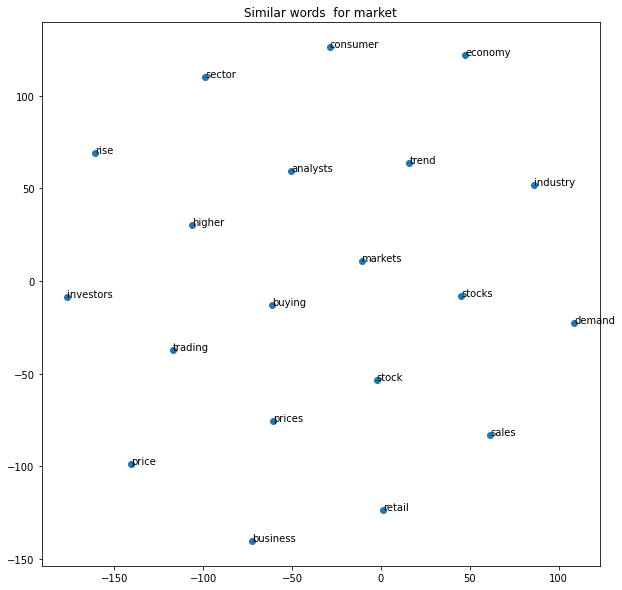

In [50]:
#Visualization for similar words for 'life'
tsne = TSNE(n_components=2, random_state=0)
# words = list(similar_words_life)
words = []
for i in range(len(similar_words_market)):
  words.append(similar_words_market[i][0])
word_vec = [model[word] for word in words]
Y = tsne.fit_transform(word_vec)

plt.figure(figsize=(10,10))
plt.title("Similar words  for market")
plt.scatter(Y[:,0], Y[:,1])

for label, x, y in zip(words, Y[:,0], Y[:,1]):
  plt.annotate(label, xy=(x,y), xytext=(0,0), textcoords="offset points")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


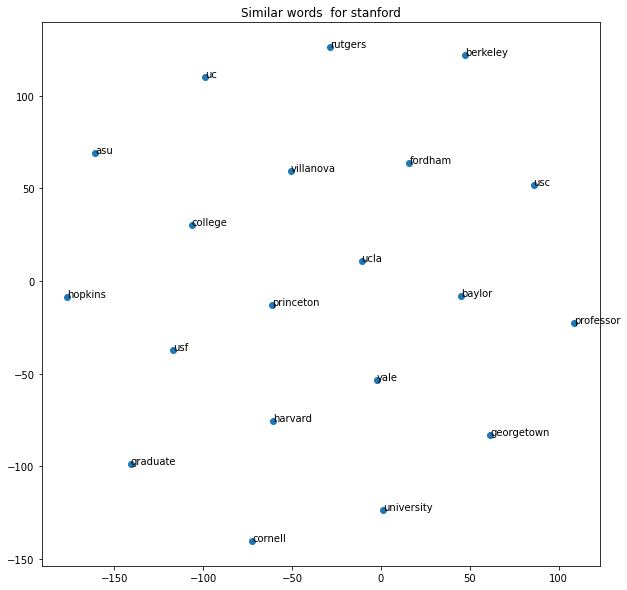

In [51]:
#Visualization for similar words for 'stanford'
tsne = TSNE(n_components=2, random_state=0)
# words = list(similar_words_life)
words = []
for i in range(len(similar_words_stanford)):
  words.append(similar_words_stanford[i][0])
word_vec = [model[word] for word in words]
Y = tsne.fit_transform(word_vec)

plt.figure(figsize=(10,10))
plt.title("Similar words  for stanford")
plt.scatter(Y[:,0], Y[:,1])

for label, x, y in zip(words, Y[:,0], Y[:,1]):
  plt.annotate(label, xy=(x,y), xytext=(0,0), textcoords="offset points")